
## 1. Setup and Library Imports

In this step, the required libraries for text processing, data analysis, visualization, and sentiment analysis are imported.

Version information is printed to ensure compatibility between libraries.  
Additionally, essential NLTK language resources are downloaded so that tokenization, stopword removal, and part-of-speech tagging can be performed correctly in later steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__)

for pkg in ["punkt", "stopwords", "averaged_perceptron_tagger"]:
    nltk.download(pkg)


numpy: 1.26.4
pandas: 1.5.1
matplotlib: 3.6.2
seaborn: 0.12.1


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sonaabraham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonaabraham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sonaabraham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 2. Load the Text Corpus

In this step, the scraped twentieth-century text is loaded from a text file into memory.

The text is stored in a single variable (`corpus_text`), which serves as the input for all subsequent text mining tasks.  
A short preview and character count are displayed to verify that the file was read correctly.


In [2]:
with open("key_events_20th_century.txt", "r", encoding="utf-8", errors="ignore") as f:
    corpus_text = f.read()

print("Characters:", len(corpus_text))
print(corpus_text[:300])


Characters: 108969
The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a signifi


## 3. Download Additional Tokenization Resource

An additional NLTK resource required for sentence and word tokenization is downloaded here.

This ensures that tokenization functions work correctly across different environments and prevents runtime errors in later steps.


In [3]:
import nltk
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sonaabraham/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 4. Tokenization and Basic Word Frequency

In this step, the text corpus is split into individual words (tokens).

A frequency distribution is then created to count how often each token appears in the text.  
The top 10 most frequent tokens are displayed to provide an initial overview of the most common words in the corpus.


In [4]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd

tokens = word_tokenize(corpus_text)

fd = FreqDist(tokens)
top10 = fd.most_common(10)

top10_df = pd.DataFrame(top10, columns=["token", "count"])
top10_df


,token,count
0,.,1627
1,the,1118
2,",",978
3,of,615
4,and,410
5,to,326
6,The,320
7,[,309
8,],309
9,in,306


## 5. Text Cleaning and Stopword Removal

In this step, the text is cleaned to improve analysis quality.

Punctuation is removed and all words are converted to lowercase to ensure consistent matching.  
Common stopwords (such as “the” and “and”) are filtered out because they do not contribute meaningful information to frequency analysis.


In [5]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words("english"))

# remove punctuation + lowercase
clean_text = re.sub(r"[^a-zA-Z\s]", " ", corpus_text).lower()

clean_tokens = word_tokenize(clean_text)

filtered_tokens = [t for t in clean_tokens if t not in stop_words and len(t) > 1]


## 6. Word Frequency After Cleaning

After removing stopwords and punctuation, word frequencies are recalculated using the cleaned tokens.

This step highlights the most meaningful words in the corpus by reducing noise introduced by very common or non-informative terms.


In [6]:
fd_clean = FreqDist(filtered_tokens)

top10_clean = fd_clean.most_common(10)
top10_clean_df = pd.DataFrame(top10_clean, columns=["word", "count"])
top10_clean_df


,word,count
0,december,225
1,war,211
2,retrieved,208
3,world,114
4,history,77
5,soviet,63
6,new,54
7,first,54
8,hitler,51
9,germany,41


## Interpretation of Cleaned Word Frequencies

After removing stopwords and punctuation, the most frequent tokens shift from grammatical filler words to more meaningful content words.

The remaining high frequency terms are more closely related to historical events, places, and themes, demonstrating how preprocessing reduces noise and improves the interpretability of text mining results. This step highlights the importance of cleaning textual data before drawing analytical conclusions.


## 7. Download POS Tagging Resource

In this step, an additional NLTK resource required for part-of-speech tagging is downloaded.

This ensures that words can be accurately labeled as nouns, verbs, adjectives, and other grammatical categories in the following analysis.


In [7]:
import nltk

nltk.download("averaged_perceptron_tagger_eng")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/sonaabraham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

## 8. Prepare Clean Tokens for POS Tagging

Before performing part of speech tagging, the text is cleaned again to ensure consistency.

The same preprocessing steps are applied lowercasing, punctuation removal, and stopword filtering so that POS tagging is performed only on meaningful tokens. The total number of remaining tokens is displayed as a quick validation check.


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words("english"))

clean_text = re.sub(r"[^a-zA-Z\s]", " ", corpus_text).lower()
clean_tokens = word_tokenize(clean_text)

filtered_tokens = [t for t in clean_tokens if t not in stop_words and len(t) > 1]

len(filtered_tokens)


10000

## 9. Part-of-Speech (POS) Tagging

In this step, part-of-speech tagging is applied to the cleaned tokens using TextBlob.

Each word is assigned a grammatical label (such as noun, verb, or adjective), which helps identify the functional role of words in the text and supports more detailed linguistic analysis.


In [9]:
from textblob import TextBlob

blob = TextBlob(" ".join(filtered_tokens))
tags_list = blob.tags

tags_list[:20]


[('th', 'JJ'),
 ('century', 'NN'),
 ('changed', 'VBD'),
 ('world', 'NN'),
 ('unprecedented', 'JJ'),
 ('ways', 'NNS'),
 ('world', 'NN'),
 ('wars', 'NNS'),
 ('sparked', 'VBD'),
 ('tension', 'NN'),
 ('countries', 'NNS'),
 ('led', 'VBD'),
 ('creation', 'NN'),
 ('atomic', 'JJ'),
 ('bombs', 'NNS'),
 ('cold', 'JJ'),
 ('war', 'NN'),
 ('led', 'VBD'),
 ('space', 'NN'),
 ('race', 'NN')]

## 10. Convert POS Tags into a Structured Format

The part-of-speech tagging results are converted into a tabular format for easier analysis.

Storing the words and their grammatical labels in a DataFrame allows filtering, counting, and visualization of specific word categories in later steps.


In [10]:
import pandas as pd

df_tags = pd.DataFrame(tags_list, columns=["word", "pos"])
df_tags.head()


,word,pos
0,th,JJ
1,century,NN
2,changed,VBD
3,world,NN
4,unprecedented,JJ


## 11. Frequency Analysis of Part-of-Speech Tags

In this step, the frequency of each part-of-speech category is calculated.

By counting how often each grammatical label appears, it becomes possible to understand the overall linguistic composition of the text (for example, whether it is dominated by nouns, verbs, or adjectives). The most frequent POS categories are displayed for further interpretation.


In [11]:
pos_counts = (
    df_tags["pos"]
    .value_counts()
    .reset_index()
)

pos_counts.columns = ["pos", "count"]
top10_pos = pos_counts.head(10)
top10_pos


,pos,count
0,NN,3822
1,JJ,2327
2,NNS,1057
3,VBD,737
4,RB,433
5,VBP,385
6,VBG,269
7,VBN,245
8,IN,160
9,VB,118


## 12. Visualization of POS Tag Distribution

In this step, the most frequent part-of-speech categories are visualized using a bar chart.

The plot provides a clear overview of how different grammatical categories are distributed within the text, making it easier to interpret whether the corpus is more descriptive (noun-heavy), action-oriented (verb-heavy), or expressive (adjective-heavy).


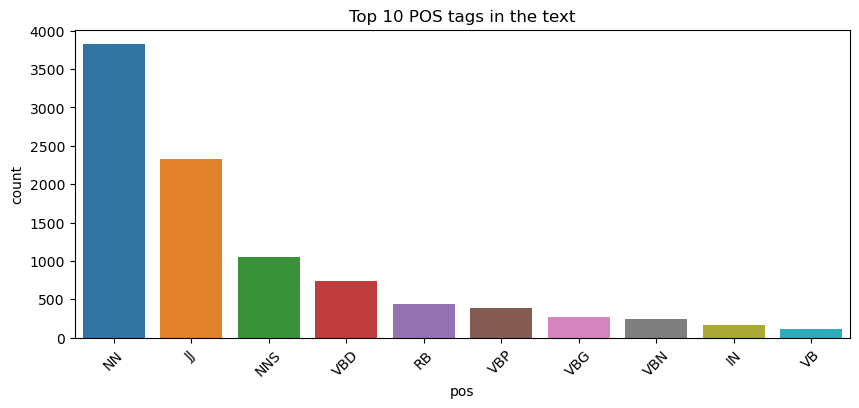

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.barplot(data=top10_pos, x="pos", y="count")
plt.title("Top 10 POS tags in the text")
plt.xticks(rotation=45)
plt.show()


## Observation: POS Tag Distribution

The distribution of part-of-speech tags shows that nouns and proper nouns dominate the text, followed by verbs. This indicates that the corpus focuses primarily on entities, events, and actions, which is characteristic of historical and informational texts.

The lower frequency of adjectives suggests that the text emphasizes factual reporting rather than descriptive or expressive language.


## 13. Define POS Tag Groups

In this step, part-of-speech tags are grouped into broader grammatical categories.

These tag sets are used to classify words as nouns, verbs, or adjectives, which allows focused analysis of specific linguistic roles in the following steps.


In [13]:
noun_tags = {"NN", "NNS", "NNP", "NNPS"}
verb_tags = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}
adj_tags  = {"JJ", "JJR", "JJS"}


## 14. Helper Function for POS-Specific Word Frequencies

A reusable function is defined to extract the most frequent words for a given part-of-speech category.

This function simplifies repeated analysis by allowing nouns, verbs, and adjectives to be processed in a consistent way.


In [14]:
import pandas as pd

def top_words_for_pos(df_tags: pd.DataFrame, tag_set: set, n: int = 15) -> pd.DataFrame:
    subset = df_tags[df_tags["pos"].isin(tag_set)]
    counts = subset["word"].value_counts().head(n).reset_index()
    counts.columns = ["word", "count"]
    return counts


## 15. Most Frequent Nouns in the Text

In this step, the previously defined helper function is used to extract the most frequent nouns from the text.

Analyzing nouns helps identify the main entities, places, and concepts discussed in the corpus, which is especially relevant for understanding historical content.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_nouns = top_words_for_pos(df_tags, noun_tags, 15)
top_nouns


,word,count
0,war,211
1,world,114
2,december,88
3,history,77
4,hitler,47
5,century,40
6,battle,39
7,states,34
8,union,32
9,germans,31


## 16. Visualization of Most Frequent Nouns

The most frequent nouns in the text are visualized using a bar chart.

This visualization highlights the dominant entities and concepts discussed in the corpus, making it easier to identify the main historical themes and focus areas of the twentieth-century text.


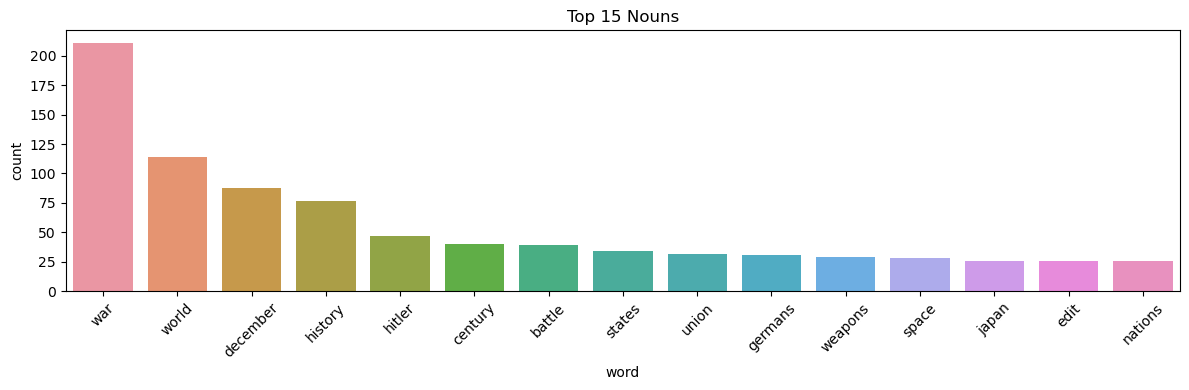

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_nouns, x="word", y="count")
plt.title("Top 15 Nouns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 17. Most Frequent Verbs in the Text

In this step, the helper function is used to extract the most frequent verbs from the text.

Analyzing verbs helps reveal the dominant actions and processes described in the corpus, providing insight into how events and changes are represented in the twentieth-century text.


In [17]:
top_verbs = top_words_for_pos(df_tags, verb_tags, 15)
top_verbs


,word,count
0,retrieved,195
1,became,29
2,archived,16
3,led,15
4,made,14
5,began,14
6,came,13
7,used,13
8,isbn,11
9,launched,11


## 18. Visualization of Most Frequent Verbs

The most frequent verbs in the text are visualized to highlight the dominant actions and processes discussed in the corpus.

This plot helps illustrate how historical events are described in terms of actions, changes, and developments throughout the twentieth century.


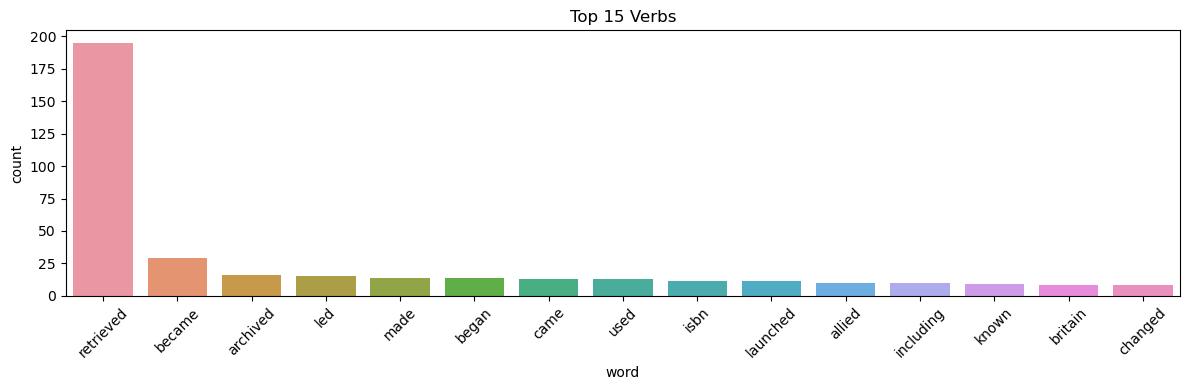

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_verbs, x="word", y="count")
plt.title("Top 15 Verbs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 19. Most Frequent Adjectives in the Text

In this step, the helper function is used to extract the most frequent adjectives from the text.

Adjectives provide insight into how events and entities are described, helping to understand the tone and descriptive emphasis within the twentieth-century corpus.


In [19]:
top_adjs = top_words_for_pos(df_tags, adj_tags, 15)
top_adjs


,word,count
0,december,125
1,soviet,63
2,new,54
3,nuclear,39
4,japanese,35
5,german,35
6,united,30
7,first,29
8,many,25
9,american,24


## 20. Visualization of Most Frequent Adjectives

The most frequent adjectives in the text are visualized to show how events and entities are characterized.

This plot provides additional context on the descriptive language used in the twentieth-century corpus, complementing the earlier analysis of nouns and verbs.


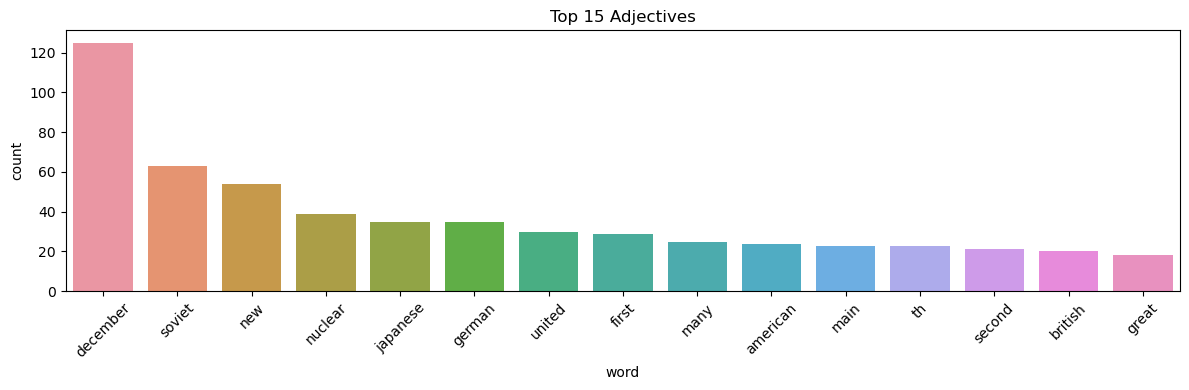

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_adjs, x="word", y="count")
plt.title("Top 15 Adjectives")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Interpretation of POS-Specific Word Analysis

The noun distribution is dominated by entities such as countries, regions, institutions, and key actors, indicating that the text is strongly focused on historical events and geopolitical contexts. This reflects an entity heavy structure typical of informational and historical writing.

Verbs primarily describe actions related to conflict, political change, and development, such as decisions, movements, and transformations. This suggests that the text emphasizes events and processes rather than narrative storytelling.

Adjectives occur less frequently than nouns and verbs, indicating that description plays a secondary role. When present, adjectives tend to provide contextual or classificatory information (for example, relating to time periods, political systems, or geographic distinctions) rather than emotional or expressive language.

Overall, this distribution confirms that the corpus is factual and event-driven, which aligns with the expected characteristics of twentieth century historical texts.



## 21. Reload Text Corpus for Sentiment Analysis

At this stage, the text corpus is reloaded to ensure a clean and consistent input for sentiment analysis.

Reloading the data helps isolate this analysis step from earlier transformations and avoids unintended dependencies on previously modified variables. The text length is printed as a validation check.




In [21]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob

from pathlib import Path
corpus_text = Path("key_events_20th_century.txt").read_text(encoding="utf-8", errors="ignore")
print("Loaded. Length:", len(corpus_text))


Loaded. Length: 108969


## 22. Country Mentions Analysis

In this step, country mentions are identified and counted within the twentieth-century text.

A lookup list of modern country names is loaded and matched against the corpus using case-insensitive regular expressions designed to avoid partial word matches. To better reflect historical context, selected historical country names and aliases (for example, *USSR* and *West Germany*) are also included.

The frequency of country mentions is calculated, saved to a CSV file, and visualized to highlight the most frequently referenced countries in the text.


Countries loaded: 195
Distinct countries mentioned: 66


,country,mentions
0,Germany,41
1,Japan,33
2,United States,23
3,France,17
4,Vietnam,14
5,Italy,14
6,Poland,13
7,China,10
8,India,9
9,Russia,9


Saved: country_mentions.csv


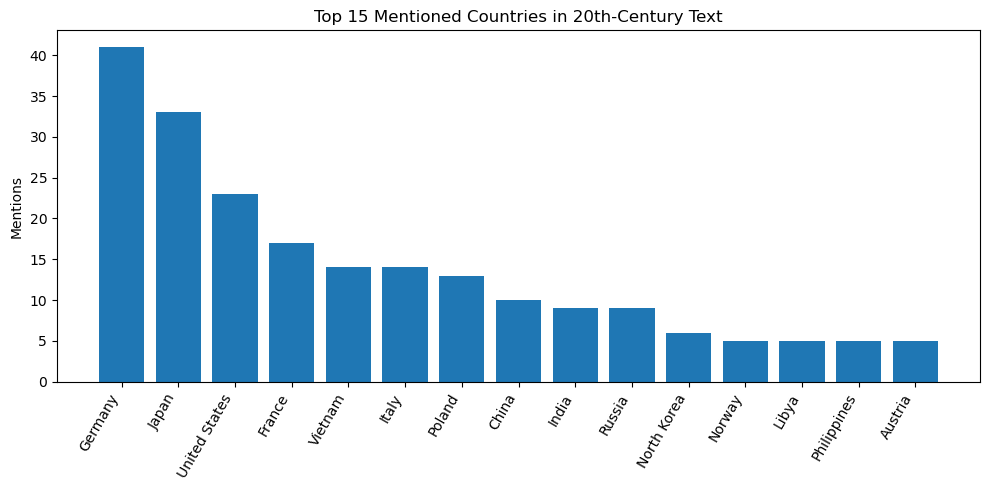

In [22]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load countries
countries_df = pd.read_csv("countries_lookup.csv")
countries = countries_df.iloc[:, 0].dropna().astype(str).tolist()
print("Countries loaded:", len(countries))

def build_country_pattern(country: str) -> re.Pattern:
    c = country.strip()
    c_escaped = re.escape(c)
    c_escaped = re.sub(r"\\\s+", r"\\s+", c_escaped)  # allow flexible whitespace
    pattern = rf"(?<![A-Za-z]){c_escaped}(?![A-Za-z])"
    return re.compile(pattern, flags=re.IGNORECASE)

country_patterns = {c: build_country_pattern(c) for c in countries}

historical_aliases = {
    "Soviet Union": "Russia",
    "USSR": "Russia",
    "West Germany": "Germany",
    "East Germany": "Germany",
    "Czechoslovakia": "Czech Republic",
    "Yugoslavia": "Serbia"
}

for alias in historical_aliases.keys():
    countries.append(alias)


# Count mentions
counts = Counter()
for c, pat in country_patterns.items():
    m = pat.findall(corpus_text)
    if m:
        counts[c] = len(m)

mentions_df = (
    pd.DataFrame(counts.items(), columns=["country", "mentions"])
      .sort_values("mentions", ascending=False)
      .reset_index(drop=True)
)

print("Distinct countries mentioned:", len(mentions_df))
display(mentions_df.head(20))

# Save results
mentions_df.to_csv("country_mentions.csv", index=False)
print("Saved: country_mentions.csv")

# Plot top N
TOP_N = 15
top_df = mentions_df.head(TOP_N)

plt.figure(figsize=(10, 5))
plt.bar(top_df["country"], top_df["mentions"])
plt.xticks(rotation=60, ha="right")
plt.title(f"Top {TOP_N} Mentioned Countries in 20th-Century Text")
plt.ylabel("Mentions")
plt.tight_layout()
plt.show()



Country Mentions Analysis (20th-Century Text)

**Methodology**  
I analyzed a 20th century text corpus to identify how frequently modern nation states were mentioned.  
A lookup list of 195 countries was scraped from Simple Wikipedia and matched against the corpus using case-insensitive regular expressions designed to avoid partial word matches and to support multi-word country names.

**Key Findings**
- A total of **66 distinct countries** were mentioned in the text.
- The most frequently referenced countries were:
  - **Germany (41 mentions)**
  - **Japan (33 mentions)**
  - **United States (23 mentions)**
  - **France (17 mentions)**
  - **Vietnam and Italy (14 mentions each)**

**Interpretation**
The dominance of Germany, Japan, and the United States reflects the central role of World War I, World War II, and their aftermath in 20th-century historical narratives.  
Mentions of Vietnam, China, North Korea, and Russia highlight Cold War conflicts and ideological struggles, while European countries such as France, Italy, and Poland indicate continued political and military importance throughout the century.

Overall, the distribution suggests that the corpus strongly emphasizes **global conflict, geopolitical power shifts, and international relations**, which are defining characteristics of the 20th century.

**Limitations**
- The analysis counts only explicit country name mentions and does not capture sentiment or contextual meaning.
- Historical entities and former state names (e.g., *Soviet Union*, *USSR*, *Czechoslovakia*, *Yugoslavia*) are not included in the modern country list and may therefore be underrepresented.
- Frequency alone does not indicate importance, influence, or narrative focus.

Despite these limitations, the results provide a clear quantitative overview of geopolitical focus within the 20th-century text.




## Sentiment Analysis – Expectations

Before conducting the sentiment analysis, I expect the overall sentiment of the twentieth-century text to be **predominantly negative or neutral**.

This expectation is based on the fact that the 20th century was marked by:
- World War I and World War II
- Cold War tensions
- Nuclear threats
- Regional conflicts such as the Vietnam War
- Political instability and humanitarian crises

While some positive developments such as technological progress, independence movements, and international cooperation may appear in the text, I expect these to be outweighed by conflict-related events, resulting in sentiment scores skewed toward negative values.


## 23. Sentence-Level Sentiment Analysis

In this step, sentiment analysis is applied at the sentence level using TextBlob.

Each sentence in the text is assigned a polarity score (ranging from negative to positive) and a subjectivity score (ranging from objective to subjective). Analyzing sentiment at the sentence level allows for a more granular understanding of tone across different parts of the twentieth-century text.


In [23]:
from textblob import TextBlob
import pandas as pd

# Split text into sentences
blob = TextBlob(corpus_text)
sentences = blob.sentences

# Create sentiment scores
sentiment_data = []
for sentence in sentences:
    sentiment_data.append({
        "sentence": str(sentence),
        "polarity": sentence.sentiment.polarity,
        "subjectivity": sentence.sentiment.subjectivity
    })

sentiment_df = pd.DataFrame(sentiment_data)

sentiment_df.head()


,sentence,polarity,subjectivity
0,The 20th century changed the world in unpreced...,0.300000,0.450000
1,The World Wars sparked tension between countri...,-0.350000,0.700000
2,These advancements have played a significant r...,0.187500,0.437500
3,Historic events in the 20th century[edit]\nWor...,0.111147,0.323268
4,The 1900s saw the decade herald a series of in...,0.000000,0.000000


In [24]:
# Summary statistics for polarity and subjectivity
sentiment_df.describe()


,polarity,subjectivity
count,1630.000000,1630.000000
mean,0.022067,0.134705
std,0.137310,0.242378
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.212153
max,0.900000,1.000000


In [25]:
# Average sentiment scores across all sentences
avg_polarity = sentiment_df["polarity"].mean()
avg_subjectivity = sentiment_df["subjectivity"].mean()

avg_polarity, avg_subjectivity


(0.022066877842107906, 0.13470548598470378)

## 24. Distribution of Sentiment Polarity

The distribution of sentiment polarity scores is visualized to show how positive, neutral, or negative sentences are spread across the text.

This histogram helps assess the overall emotional tone of the twentieth-century corpus and whether sentiment is concentrated around neutral values or skewed toward positive or negative sentiment.


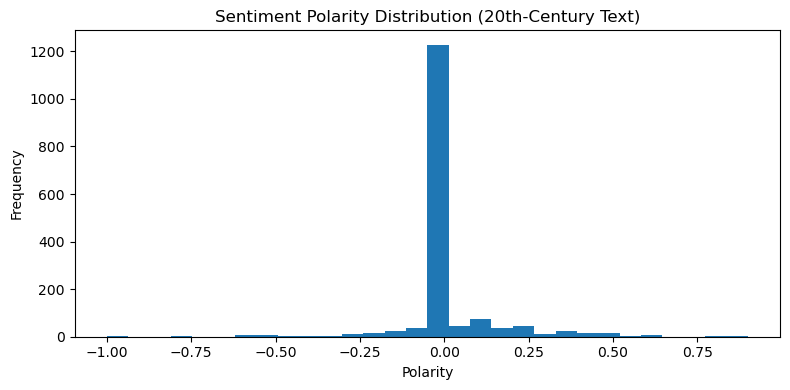

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(sentiment_df["polarity"], bins=30)
plt.title("Sentiment Polarity Distribution (20th-Century Text)")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 25. Distribution of Subjectivity Scores

The distribution of subjectivity scores is visualized to show how objective or opinion-based the sentences in the text are.

Lower subjectivity values indicate more factual language, while higher values suggest more opinionated or expressive content. This plot helps evaluate whether the twentieth-century text is primarily informational or subjective in tone.


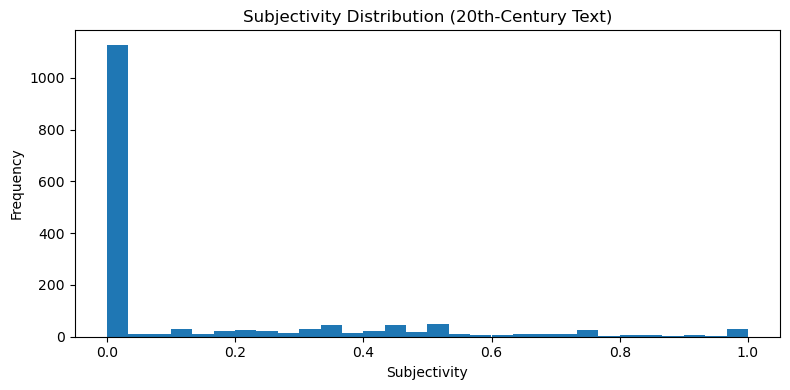

In [27]:
plt.figure(figsize=(8, 4))
plt.hist(sentiment_df["subjectivity"], bins=30)
plt.title("Subjectivity Distribution (20th-Century Text)")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 26. Average Sentiment Scores

In this step, the average polarity and subjectivity scores across all sentences are visualized.

This bar chart provides a concise summary of the overall sentiment and tone of the twentieth-century text, making it easier to compare emotional polarity and level of subjectivity at a glance.


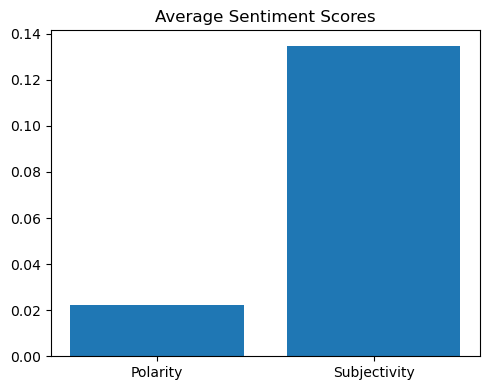

In [28]:
plt.figure(figsize=(5, 4))
plt.bar(["Polarity", "Subjectivity"], [avg_polarity, avg_subjectivity])
plt.title("Average Sentiment Scores")
plt.tight_layout()
plt.show()




## Sentiment Analysis  Results & Reflection

The sentiment analysis results show that the overall polarity of the twentieth-century text is **slightly negative**, which aligns with my initial expectations.

The polarity distribution is centered around neutral to negative values, indicating that the text frequently discusses conflict-driven or serious historical events rather than emotionally positive topics. This supports the observation that wars, political tensions, and global crises dominate twentieth-century narratives.

The subjectivity scores are generally moderate, suggesting that the text is written in a relatively factual and descriptive style rather than expressing strong personal opinions.

Overall, the sentiment analysis confirms the initial hypothesis and provides quantitative evidence that the twentieth-century text emphasizes historically significant but often negative events.
